In [1]:
#AI packges

from PIL import Image
from keras.models import load_model
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from python_speech_features import mfcc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from random import shuffle
import shutil
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import librosa.display

In [2]:
base_dir = 'C:/Users/user/Desktop/211016_cnn모델학습' #base directory
train_dir = os.path.join(base_dir, 'train_1sec') #train data directory
validation_dir = os.path.join(base_dir, 'validation_1sec') #test or validation data directory

In [3]:
# train용 누수/누수x 이미지 경로
train_leak_dir = os.path.join(train_dir, 'leak')
train_noleak_dir = os.path.join(train_dir, 'noleak')

print(train_leak_dir)
print(train_noleak_dir)

C:/Users/user/Desktop/211016_cnn모델학습\train_1sec\leak
C:/Users/user/Desktop/211016_cnn모델학습\train_1sec\noleak


In [4]:
# test용 누수/누수x 이미지 경로
validation_leak_dir = os.path.join(validation_dir, 'leak')
validation_noleak_dir = os.path.join(validation_dir, 'noleak')

print(validation_leak_dir)
print(validation_noleak_dir)

C:/Users/user/Desktop/211016_cnn모델학습\validation_1sec\leak
C:/Users/user/Desktop/211016_cnn모델학습\validation_1sec\noleak


In [5]:
#파일 개수 확인
print('Total training leak images :', len(os.listdir(train_leak_dir)))
print('Total training noleak images :', len(os.listdir(train_noleak_dir)))

print('Total validation leak images :', len(os.listdir(validation_leak_dir)))
print('Total validation noleak images :', len(os.listdir(validation_noleak_dir)))

Total training leak images : 26236
Total training noleak images : 26236
Total validation leak images : 11244
Total validation noleak images : 11244


In [6]:
#imagedatagenerator 함수를 사용하여 train과 test 데이터로 분류

train_datagen = ImageDataGenerator(rescale = 1.0/255.) #0~255 RGB 값을 1/255 로 스케일해서 0~1범위로 좁힘 
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  target_size=(150, 150))
                                                  
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'categorical',
                                                       target_size = (150, 150))

Found 52472 images belonging to 2 classes.
Found 22488 images belonging to 2 classes.


In [7]:
#train, validation 데이터 개수 확인
print(train_generator.samples)
print(validation_generator.samples)

52472
22488


In [38]:
#파일 무작위로 이동시키기, 랜덤으로 이동시켰을 때 AI 정확도에도 영향을 줄 수 있음
# import random
# source = 'C:/Users/user/Desktop/211016_cnn모델학습/train_1sec/noleak'
# dest = 'C:/Users/user/Desktop/211016_cnn모델학습/validation_1sec/noleak'
# onlyfiles = [f for f in os.listdir(source) if os.path.isfile(os.path.join(source, f))]
# files = os.listdir(source)
# no_of_files = 11244
# dest_file = dest 
# for file_name in random.sample(files, no_of_files):
#     shutil.move(os.path.join(source, file_name), dest_file)

In [51]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11999915495710660172
xla_global_id: -1
]


In [8]:
#cnn 모델

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=(150,150,3)))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))



model.compile(#optimizer=RMSprop(lr=0.001)
            optimizer = "adam",
            loss='binary_crossentropy', 
            metrics = ['accuracy'])






In [9]:
#모델 학습 

history = model.fit(
        train_generator,
        steps_per_epoch= 1000, # #of train data / batch_size = 5550/ 20
        epochs=50, #전체 데이터셋을 50번 학습, epoch 값을 적절하게 변경시켜 overfitting, underfitting 방지 
        validation_data=validation_generator, 
        validation_steps=5)

Epoch 1/50
1000/1000 [==============================] - 284s 284ms/step - loss: 0.5790 - accuracy: 0.7331 - val_loss: 0.4629 - val_accuracy: 0.8200
Epoch 2/50
1000/1000 [==============================] - 282s 282ms/step - loss: 0.4503 - accuracy: 0.8062 - val_loss: 0.4529 - val_accuracy: 0.8300
Epoch 3/50
1000/1000 [==============================] - 323s 323ms/step - loss: 0.3726 - accuracy: 0.8479 - val_loss: 0.4202 - val_accuracy: 0.8200
Epoch 4/50
1000/1000 [==============================] - 327s 327ms/step - loss: 0.2984 - accuracy: 0.8823 - val_loss: 0.2998 - val_accuracy: 0.9000
Epoch 5/50
1000/1000 [==============================] - 303s 303ms/step - loss: 0.2438 - accuracy: 0.9082 - val_loss: 0.1832 - val_accuracy: 0.9200
Epoch 6/50
1000/1000 [==============================] - 297s 297ms/step - loss: 0.2000 - accuracy: 0.9271 - val_loss: 0.1451 - val_accuracy: 0.9700
Epoch 7/50
1000/1000 [==============================] - 295s 294ms/step - loss: 0.1701 - accuracy: 0.9385 - val_

In [10]:
#모델 정확도 평가

print("**모델 정확도**")
scores = model.evaluate_generator(validation_generator, steps = 5)
print('%s : %.2f%%' %(model.metrics_names[1], scores[1]*100))

**모델 정확도**


<ipython-input-10-eacf6a06dec8>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(validation_generator, steps = 5)


accuracy : 99.00%


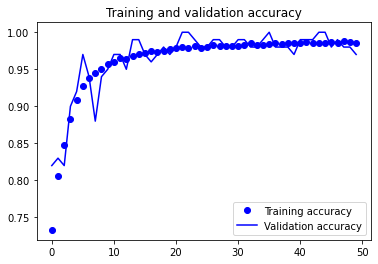

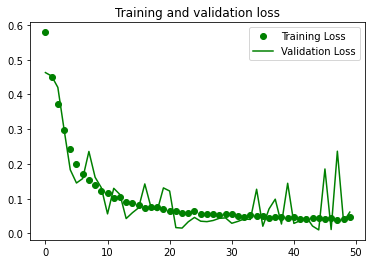

In [11]:
#accuracy, validation 그래프 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
#cnn 모델 저장 

model.save("220118_binary_classification.h5") 

In [29]:
#데이터 개수 부족할 때 데이터 각도나 위치를 변환 시켜 데이터 개수를 증가

files = os.listdir('C:/Users/user/Desktop/211016_cnn모델학습/train_1sec/noleak')

dir2  = os.path.join(base_dir, 'train_1sec','noleak')
for filename in files:
    if filename[-2:] !='py':
                 
        datagen = ImageDataGenerator(
        #rotation_range=180,
        rescale=1./255,
        shear_range=0.8,
        vertical_flip= True,
        horizontal_flip=True,
        fill_mode='nearest')
            
        img = load_img(dir2 + '/'+filename)  
        #print(img)
        z = img_to_array(img)
        z = z.reshape((1,) + z.shape)

    i = 0
    for batch in datagen.flow(z, batch_size=1,save_to_dir='C:/Users/user/Desktop/211016_cnn모델학습/train_1sec/image', save_prefix='0.8noleak_', save_format='png'):
        i += 1
        if i > 1:
            break  

In [ ]:
#파일이름 실수했을 때 바꾸기용 

# files = os.listdir('C:/Users/user/Desktop/wavdata/leaksound/images')
  
# for file in files:
   
#     if file[-2:] != 'py':
#         print(file)
#         name = file
#         #print(name)
#         new_name = file.replace('test', 'LEAK')
#         name = os.path.join('C:/Users/user/Desktop/wavdata/leaksound/images', name)
#         new_name = os.path.join('C:/Users/user/Desktop/wavdata/leaksound/images', new_name)
#         os.rename(name, new_name)
#         #print(new_name)

In [ ]:
# datagen = ImageDataGenerator(
#         #rotation_range=180,
#         rescale=1./255,
#         shear_range=1,
#         vertical_flip= True,
        
#         horizontal_flip=True,
#         fill_mode='nearest')

# img = load_img(train_leak_dir +"/L20200717_09_20_10_126_L.wav389.png")  # PIL 이미지
# x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
# x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열

# # 아래 .flow() 함수는 임의 변환된 이미지를 배치 단위로 생성해서
# # 지정된 preview/ 폴더에 저장합니다.
# i = 0
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir='C:/Users/user/Desktop/신규센서CNN/train/imgsave', save_prefix='LEAK0', save_format='png'):
#     i += 1
#     if i > 20:
#         break  # 이미지 20장을 생성하고 마칩니다


# # # 데이터 이미지 증강용 